In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
data = pd.read_csv("DataSetViana/Variados/Polar_H10_AD655A21_20240917_064124_RR.txt", sep=';')
rr = data['RR-interval [ms]'].to_numpy()
rr_ = rr[50:]

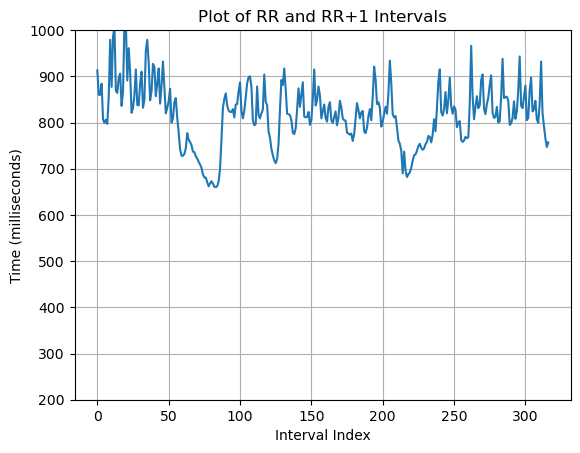

In [24]:
plt.plot(rr_)
plt.title('Plot of RR and RR+1 Intervals')  
plt.xlabel('Interval Index')
plt.ylabel('Time (milliseconds)')
plt.ylim(200, 1000)  # Definir o limite do eixo Y entre 0 e 1000
plt.grid(True)

In [25]:

def calculate_pnn50(rr_intervals):
    diff_rr = np.abs(np.diff(rr_intervals))
    nn50 = np.sum(diff_rr > 50)
    pnn50 = (nn50 / len(diff_rr)) * 100
    return pnn50

def calculate_rmssd(rr_intervals):
    diff_rr = np.diff(rr_intervals)
    rmssd = np.sqrt(np.mean(diff_rr**2))
    return rmssd

def calculate_sdnn(rr_intervals):
    sdnn = np.std(rr_intervals, ddof=1)
    return sdnn

def calculate_triangular_index(rr_intervals):
    rr_hist, bin_edges = np.histogram(rr_intervals, bins='auto')
    triangular_index = len(rr_intervals) / np.max(rr_hist)
    return triangular_index 
def calculate_sdsd(rr_intervals):
    diff_rr = np.diff(rr_intervals)
    sdsd = np.std(diff_rr, ddof=1)
    return sdsd

pnn50 = calculate_pnn50(rr_)
rmssd = calculate_rmssd(rr_)
sdnn = calculate_sdnn(rr_)
triangular_index = calculate_triangular_index(rr_)
sdsd = calculate_sdsd(rr_)

# Exibir os resultados
print(f"pNN50: {pnn50:.2f}%")
print(f"RMSSD: {rmssd:.2f} ms")
print(f"SDNN: {sdnn:.2f} ms")
print(f"Triangular Index: {triangular_index:.2f}")
print(f"SDSD: {sdsd:.2f} ms")

pNN50: 20.57%
RMSSD: 40.99 ms
SDNN: 66.15 ms
Triangular Index: 5.28
SDSD: 41.06 ms
